<a href="https://colab.research.google.com/github/cleitonmoya/CPE721_Trabalho/blob/main/exemplo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercícios de Classe 1

In [552]:
import numpy as np
from numpy import log
import matplotlib.pyplot as plt
from scipy.stats import binom, norm
import seaborn as sns

## Exercício 1

### Notação e revisão de conceitos

Para pardronizar a notação e também revisar alguns conceitos, vamos utilizar os mesmos termos normalmente utilizados em **testes de hipóteses**:

* $\mathcal{H}_0: F=0$
  * Hipótese nula
* $\mathcal{H}_1: F=1$
  * Hipótese alternativa
* $\mathbb{P}[R_i=1|F=0] = α$
  * Taxa de falsos positivos (FPR)
  * $α$: Erro to tipo I
  * Probabilidade de rejeitar erroneamente a hipótese nula
  * Nível de significância
* $\mathbb{P}[R_i=1|F=1] = 1-β$
  * Taxa de verdadeiros positivos (TPR)
  * Sensibilidade
  * $β$: Erro do tipo II (FNR)
  * Probabilidade de rejeitar corretamente a hipótese nula
  * Potência do teste

  

Vamos revisar também os conceitos de **inferência bayesiana**:

* Na inferência bayesiana, definimos uma distribuição de probabilidade para cada variável aleatória.
* Neste problema simples, estamos considerando que toda as v.a. são do tipo Bernoulli (binárias, discretas), então podemos escrever o Teorema de Bayes utilizando funções de probablidade massa (pmf):

\begin{align}
        p[F \mid R_i] = \frac{p[R_i \mid F] \times p[F]}{p[R_i]}
    \end{align}

* $p[F]$: *Prior probability*
* $p[R_i \mid F]$: função de *likelihood* (não necessariamente é uma distribuição!)
* $p[F \mid R_i]$: *Posterior probability*
* $p[R_i]$: Probabilidade do dado ponderada por todos valores possíveis da hipótese

Dados do problema:

In [553]:
α = 0.1 # FPR
β = 0.2 # 1-TPR
π = 0.1

### Item a)

Para $N=1$:

* $\mathbb{P}[R_1=1|F=1] = 1-\beta$.
* Observa-se que trata-se da definição de TPR.

In [554]:
R_ = 1-β
print(R_)

0.8


Para $N=3$:

* Utilizamos a premissa de que os resultados dos detectores são **condicionalmente independentes** em relação à falha:

\begin{align}
  \mathbb{P}[R_1=1, R_2=1, R_3=1|F=1] = &\mathbb{P}[R_1=1|F=1] 
    \\ &\times \mathbb{P}[R_2=1|F=1] 
    \\ &\times \mathbb{P}[R_3=1|F=1]
\end{align}

* Então:

\begin{align}
\mathbb{P}[R_1=1, R_2=1, R_3=1|F=1]  = (1-\beta)^3
\end{align}

In [555]:
R_ = (1-β)**3
print(R_)

0.5120000000000001


### Item b)

Para $N=1$:

* $\mathbb{P}[R_1=1|F=0] = \alpha$.
* Observa-se que trata-se da definição de FPR.

Para $N=3$:

* Utilizamos a mesma premissa de que os resultados dos detectores são **condicionalmente independentes** em relação à falha;
* Temos então:

\begin{align}
\mathbb{P}[R_1=1, R_2=1, R_3=1|F=0]  = \alpha^3
\end{align}

In [556]:
R_ = α**3
print(R_)

0.0010000000000000002


### Item c)

Para calcular a probabilidade de falha à posteriori, utilizamos o Teorema de Bayes:

\begin{align}
  \mathbb{P}[F = 1 \mid R_1=1] = \frac{\mathbb{P}[R_1=1|F=1]\times \mathbb{P}[F=1]}{\mathbb{P}[R_1=1]} 
\end{align}

O denominador, probabilidade do dado, é determinado pela **Lei da Probabilidade Total**:

\begin{align}
  \mathbb{P}[R_1] = &\mathbb{P}[R_1=1 \mid F=1]\times \mathbb{P}[F=1]  \\
  &+ \mathbb{P}[R_1=1\mid F=0]\times \mathbb{P}[F=0] 
\end{align}

Assim,

\begin{align}
  \mathbb{P}[F=1 \mid R_1=1] = \frac{\pi (1-\beta)}{\pi(1-\beta) + (1-\pi)\alpha} \\ 
\end{align}

In [557]:
R_ = π*(1-β)/(π*(1-β)+(1-π)*α)
print(R_)

0.47058823529411764


### Item d)

Para melhorar a ligibilidade, à partir de agora vamos utilizar a notação  $R_i \triangleq R_i=1$ e $\bar{R_i} \triangleq R_i=0$.

Queremos calcular a probabilidade a posteriori $\mathbb{P}[F=1 \mid R_1, R_2, R_3$]. Aplicando o Teorema de Bayes:

\begin{align}
  \mathbb{P}[F = 1 \mid R_1, R_2, R_3] = \frac{\mathbb{P}[R_1, R_2, R_3|F=1]\times \mathbb{P}[F=1]}{\mathbb{P}[R_1, R_2, R_3]} 
\end{align}

O denominador é determindo à partir da **Lei da Probabilidade Total**: 

\begin{align}
  \mathbb{P}[R_1, R_2, R_3] = &\mathbb{P}[R_1, R_2, R_3 \mid F=1]\times \mathbb{P}[F=1]  \\
  &+ \mathbb{P}[R_1, R_2, R_3\mid F=0]\times \mathbb{P}[F=0] 
\end{align}

Chegamos assim em:

\begin{align}
  \mathbb{P}[F=1 \mid R_1, R_2, R_3] = \frac{\pi (1-\beta)^3}{\pi(1-\beta)^3 + (1-\pi)\alpha^3} \\ 
\end{align}

Note que não podemos assumir a independência total das detectores, ou seja, não podemos assumir que $\mathbb{P}[R_1, R_2, R_3] = \mathbb{P}[R_1]\times\mathbb{P}[R_2]\times\mathbb{P}[R_3]$. Ao invés, devemos ponderar a probabilidae dos dados utilizando todos os valores possíveis da hipótese (neste caso $F=0$ e $F=1$) e assumir a independência condicional.

In [558]:
R_ = π*(1-β)**3/(π*(1-β)**3+(1-π)*α**3)
print(R_)

0.9827255278310941


### Item e)

Generalizando o resultado dos dois itens anteriores:

\begin{align}
  \mathbb{P}[F=1 \mid R_1, \ldots R_N] = \frac{\pi (1-\beta)^N}{\pi(1-\beta)^N + (1-\pi)\alpha^N} \\ 
\end{align}

### Item f)

#### Decisão pela Likelihood

Seja $X$ uma v.a. que conta o número de detectores que indicaram a falha.

Levando-se em consideração novamente a indenpendência condiconal, $X$ segue uma distribuição **binomial** (condicional):

\begin{align} 
p[X=n|F=1] &= \binom{N}{n}(1-β)^n β^{N-n} \\
p[X=n|F=0] &= \binom{N}{n}α^n(1-α)^{N-n}
\end{align}

Podemos calcular o valor  esperado da quantidade de detectores que alarmam em caso de falha: 

\begin{align}
  \mathbb{E}[X|F=1] = N(1-\beta)
\end{align}

Arbitrando um valor de $N$ para exemplificar:

In [559]:
N = 100
E_ = N*(1-β)
print(E_)

80.0


Visualizando as duas distribuições:

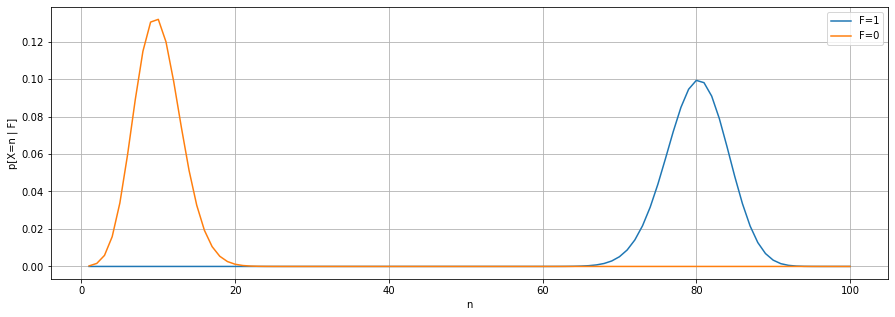

In [560]:
pmf1 = lambda n: binom.pmf(k=n, n=N, p=(1-β))
pmf0 = lambda n: binom.pmf(k=n, n=N, p=α)
x = np.arange(1,N+1,1)
plt.figure(figsize=(15,5))
plt.plot(x,pmf1(x), label='F=1')
plt.plot(x,pmf0(x), label='F=0')
plt.xlabel('n')
plt.ylabel('p[X=n | F]')
plt.legend()
plt.grid()
plt.show()

Uma forma de quantificar a confiança para um determinado valor $n$ é calcular a ***likelihood*** para a observação destes dados, utilizando as funções **pmf** calculadas acima. 

Importante notar que, neste caso específico, como modelamos os dados utilizando diretamente uma distribuição discreta (binomial), observamos que a *likelihood* corresponde a um valor de probabilidade (entre $0$ e $1$). Entretanto, se tivéssemos utilizado uma distribuição contínua ou tivéssemos modelado a função *likelihood* à partir da multiplicação de *N* distribuições de Bernoulli, não teríamos o valor normalizado. 

Observamos também que a distância entre as distribuições depende da quantidade de dados e também dos parâmetros. Por exemplo:

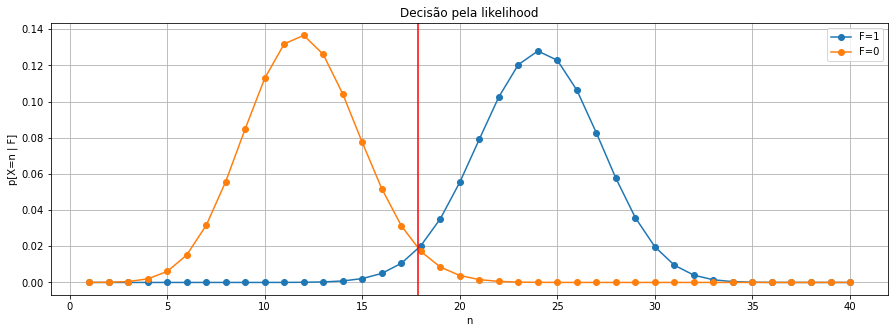

In [561]:
N = 40
α = 0.3
β = 0.4
X1 = binom(n=N, p=(1-β))
X0 = binom(n=N, p=α)
pfm0 = lambda k: X0.pmf(k)
pfm1 = lambda k: X1.pmf(k)
x = np.arange(1,N+1,1)
plt.figure(figsize=(15,5))
plt.title('Decisão pela likelihood')
plt.plot(x,X1.pmf(x), '-o', label='F=1')
plt.plot(x,X0.pmf(x), '-o', label='F=0')
plt.axvline(x=n0, color='red')
plt.xlabel('n')
plt.ylabel('p[X=n | F]')
plt.legend()
plt.grid()
plt.show()

##### Likelihood ratio test

Para classificação binária utilizando a perda **a perda 0-1**, o teste de decisão pela Likelihood ratio é da forma:

\begin{align}
  \frac{p[X=n \mid F=1]}{p[X=n \mid F=0]} > \eta = \frac{\mathbb{P}[F=0]}{\mathbb{P}[F=1]}
\end{align}

Podemos então encontrar a fronteira de decisão $n_0$ resolvendo a equação para $n$:

\begin{align}
  n_0 = \frac{\log(η)+N \left[ \log(1-α)-\log(β)\right]}{\log(1-β)-\log(β)+log(1-α)-log(α)}
\end{align}

In [607]:
η = (1-π)/π
n0 = (log(η) + N*(log(1-α)-log(β)))/(log(1-β)-log(β)+log(1-α)-log(α))
print(n0)

17.401978758692962


Por exemplo, para $n=18$, teríamos maior confiança na hipótese $F=1$ do que na hipótese $F=0$:

In [563]:
n=18
print('P[X=18|F=0] =', X0.pmf(n))
print('P[X=18|F=1] =', X1.pmf(n))

P[X=18|F=0] = 0.017174216000508034
P[X=18|F=1] = 0.020257216589414023


##### Matriz de confusão

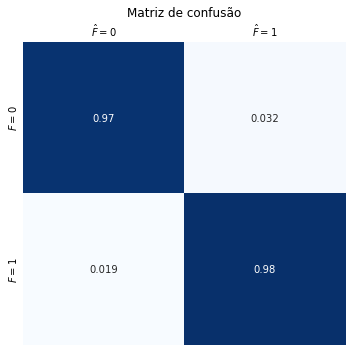

In [579]:
d = 18 # fronteira de decisão
TNR = sum([pmf0(n) for n in range(1,d)])
FPR = sum([pmf0(n) for n in range(d,N+1)])
FNR = sum([pmf1(n) for n in range(1,d)])
TPR = sum([pmf1(n) for n in range(d,N+1)])
conf_m = np.array([[TNR, FPR],[FNR, TPR]])

fig, ax = plt.subplots(figsize=(5,5))
ax.set_title('Matriz de confusão')
sns.heatmap(conf_m, annot=True, cmap='Blues', 
                 xticklabels=[r'$\hat{F}=0$', r'$\hat{F}=1$'],
                 yticklabels=[r'$F=0$', r'$F=1$'], cbar=False, ax=ax)
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
ax.tick_params(length=0)
plt.tight_layout()

#### Decisão pela Posterior

Uma outra forma de quantificar a confiança para a decisão, agora adotando uma **abordagem bayesiana**, é calcularmos a probabilidade a posteriori: $\mathbb{P}[F=1 \mid X=n]$.

\begin{align}
  \mathbb{P}[F=1 \mid X=n] &= \frac{\mathbb{P}[X=n \mid F=1]\mathbb{P}[F=1]}{\mathbb{P}[X=n]} \\
  &= \frac{\pi\binom{N}{n}(1-\beta)^n\beta^{N-n}}{\pi\binom{N}{n}(1-\beta)^n\beta^{N-n} + (1-\pi)\binom{N}{n}\alpha^n(1-\alpha)^{N-n}} \\
  &= \frac{\pi(1-\beta)^n\beta^{N-n}}{\pi(1-\beta)^n\beta^{N-n} + (1-\pi)\alpha^n(1-\alpha)^{N-n}}
\end{align}

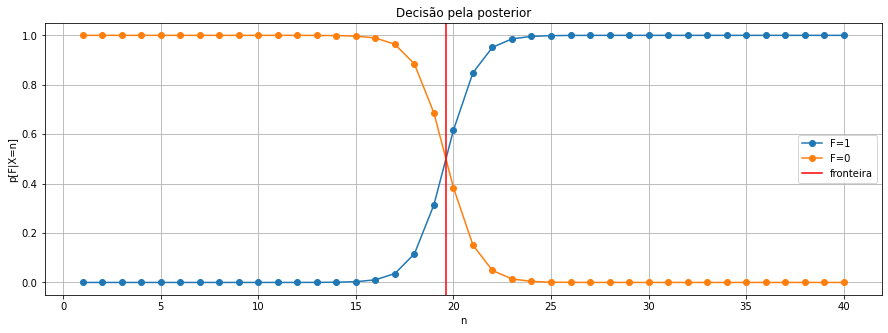

In [564]:
pos1 = lambda n: π*pmf1(n)/(π*pmf1(n) + (1-π)*pmf0(n))
pos0 = lambda n: (1-π)*pmf0(n)/(π*pmf1(n) + (1-π)*pmf0(n))

x = np.arange(1,N+1,1)
plt.figure(figsize=(15,5))
plt.title('Decisão pela posterior')
plt.plot(x,pos1(x), '-o', label='F=1')
plt.plot(x,pos0(x), '-o', label='F=0')
plt.axvline(x=19.6, color='red', label='fronteira')
plt.xlabel('n')
plt.ylabel('p[F|X=n]')
plt.legend()
plt.grid()
plt.show()

Calculando a probabilide a posteriori para $n=18$:

In [565]:
print('P[F=0|X=18] =', pos0(18))
print('P[F=1|X=18] =', pos1(18))

P[F=0|X=18] = 0.8841287116763511
P[F=1|X=18] = 0.11587128832364896


Interessante notar que, para uma fronteira de decisão em $\mathbb{P}[F|X=18]=0.5$, **a decisão pela *posterior* difere da decisão pela *likelihood***. \\
Isso ocorre porque a probabilidade a posteriori leva em considerção também a *prior*, enquanto a *likelihood* leva em consideração apens a informação dos detectores.

### Item g)

Queremos encontrar $N$ e $d$ tais que:

\begin{align}
 \mathbb{P}[\hat{F}=1 \mid F=1] = p[X \geq n \mid F=1] = \sum_{k=d}^{N} \binom{N}{k}\left(1-\beta \right)^k\beta^\left(N-k\right) &> \rho_1 \\
  \mathbb{P}[\hat{F}=1 \mid F=0] = p[X \geq n \mid F=0] = \sum_{k=d}^{N} \binom{N}{k}\alpha^k\left(1-\alpha\right)^\left(N-k\right) &< \rho_2
\end{align}

Observamos que trata-se de um problema de solução não trivial.

## Exercício 2

Dados:

$\mathbb{P}[C_i=1 \mid F_i=0] = \alpha_2 = 0.01$ \\
$\mathbb{P}[C_i=1 \mid F_i=1] = (1-\beta_2) = 0.1$

In [596]:
α = 0.1
β = 0.2
α2 = 0.01
β2 = 0.9

### Item a)

Probabilidade a posteriori de falha dado que um cliente abriu um chamado:

\begin{align}
\mathbb{P}[F=1 \mid C_i=1] &= \frac{\mathbb{P}[C_i=1 \mid F=1]\times\mathbb{P}[F=1]}{\mathbb{P}[C_i=1 \mid F=0]\times\mathbb{P}[F=0] + \mathbb{P}[C_i=1 \mid F=1]\times\mathbb{P}[F=1]} \\
&= \frac{π(1-β_2)}{(1-π)α_2 + π(1-β_2)}
\end{align}

In [600]:
R_ = (1-β2)*π/((1-π)*α2 + π*(1-β2))
print(R)

0.5263157894736842


### item b)

Probabilidade um cliente abrir um chamado e um detector indicar falha, dado que o equipamento está em falha:

\begin{align}
  \mathbb{P}[C_i=1, R_j=1 \mid F=1] &= \mathbb {P}[C_j=1 \mid F=1] \times \mathbb{P}[R_i=1 \mid F=1] \\
  &= (1-β)\times(1-β_2)
\end{align}

In [601]:
R_ = (1-β)*(1-β2)
print(R_)

0.07999999999999999


### item c)

Probabilidade um cliente abrir um chamado e um detector indicar falha, dado que o equipamento NÃO está em falha:

\begin{align}
  \mathbb{P}[C_i=1, R_j=1 \mid F=0] &= \mathbb{P}[C_i=1 \mid F=0] \times \mathbb{P}[R_j=1 \mid F=0] \\
  &= α\times α_2
\end{align}

In [603]:
α*α2

0.001

### item d)

Probabilidade a posteriori de falha dado que cliente abriu um chamado e o detector indicou falha:  

\begin{align}
  \mathbb{P}[F=1 \mid C_i=1, R_j=1] &= \frac{\mathbb{P}[C_i=1, R_j=1 \mid F=1]\times\mathbb{P}[F_i=1]}{\mathbb{P}[C_i=1, R_j=1]} \\
\end{align}

Calculando a Probabilidade Total:

\begin{align}
  \mathbb{P}[C_i=1, R_j=1] = \mathbb{P}[C_i=1, R_j=1 | F=0]\times{P}[F=0] + 
    \mathbb{P}[C_i=1, R_j=1 | F=1]\times{P}[F=1]
\end{align}

Assim, utilizando os resultados anteriormente calculados:

\begin{align}
  \mathbb{P}[F=1 \mid C_i=1, R_j=1] &= \frac{\pi(1-\beta)(1-\beta_2)}{\pi(1-\beta)(1-\beta_2) + (1-\pi)\alpha\times\alpha_2} \\
\end{align}

In [606]:
R_ = π*(1-β)*(1-β2)/(π*(1-β)*(1-β2) + (1-π)*α*α2)
print(R_)

0.898876404494382
